## Import Libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Step 1: Reading, Understanding and visualing the data

In [2]:
initial_data = pd.read_csv('day.csv')
initial_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Checking for null rows
initial_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Observations from above information

1. There are total 730 rows and 16 columns
2. There are no null columns or rows
3. There are no missing values
4. There are no header rows and footer rows
5. 'dteday' column is not in datetime format

In [5]:
# Understanding the data by reading min, max, mean values
initial_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Segmenting the varaibles into continous and categorical variables
cont_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

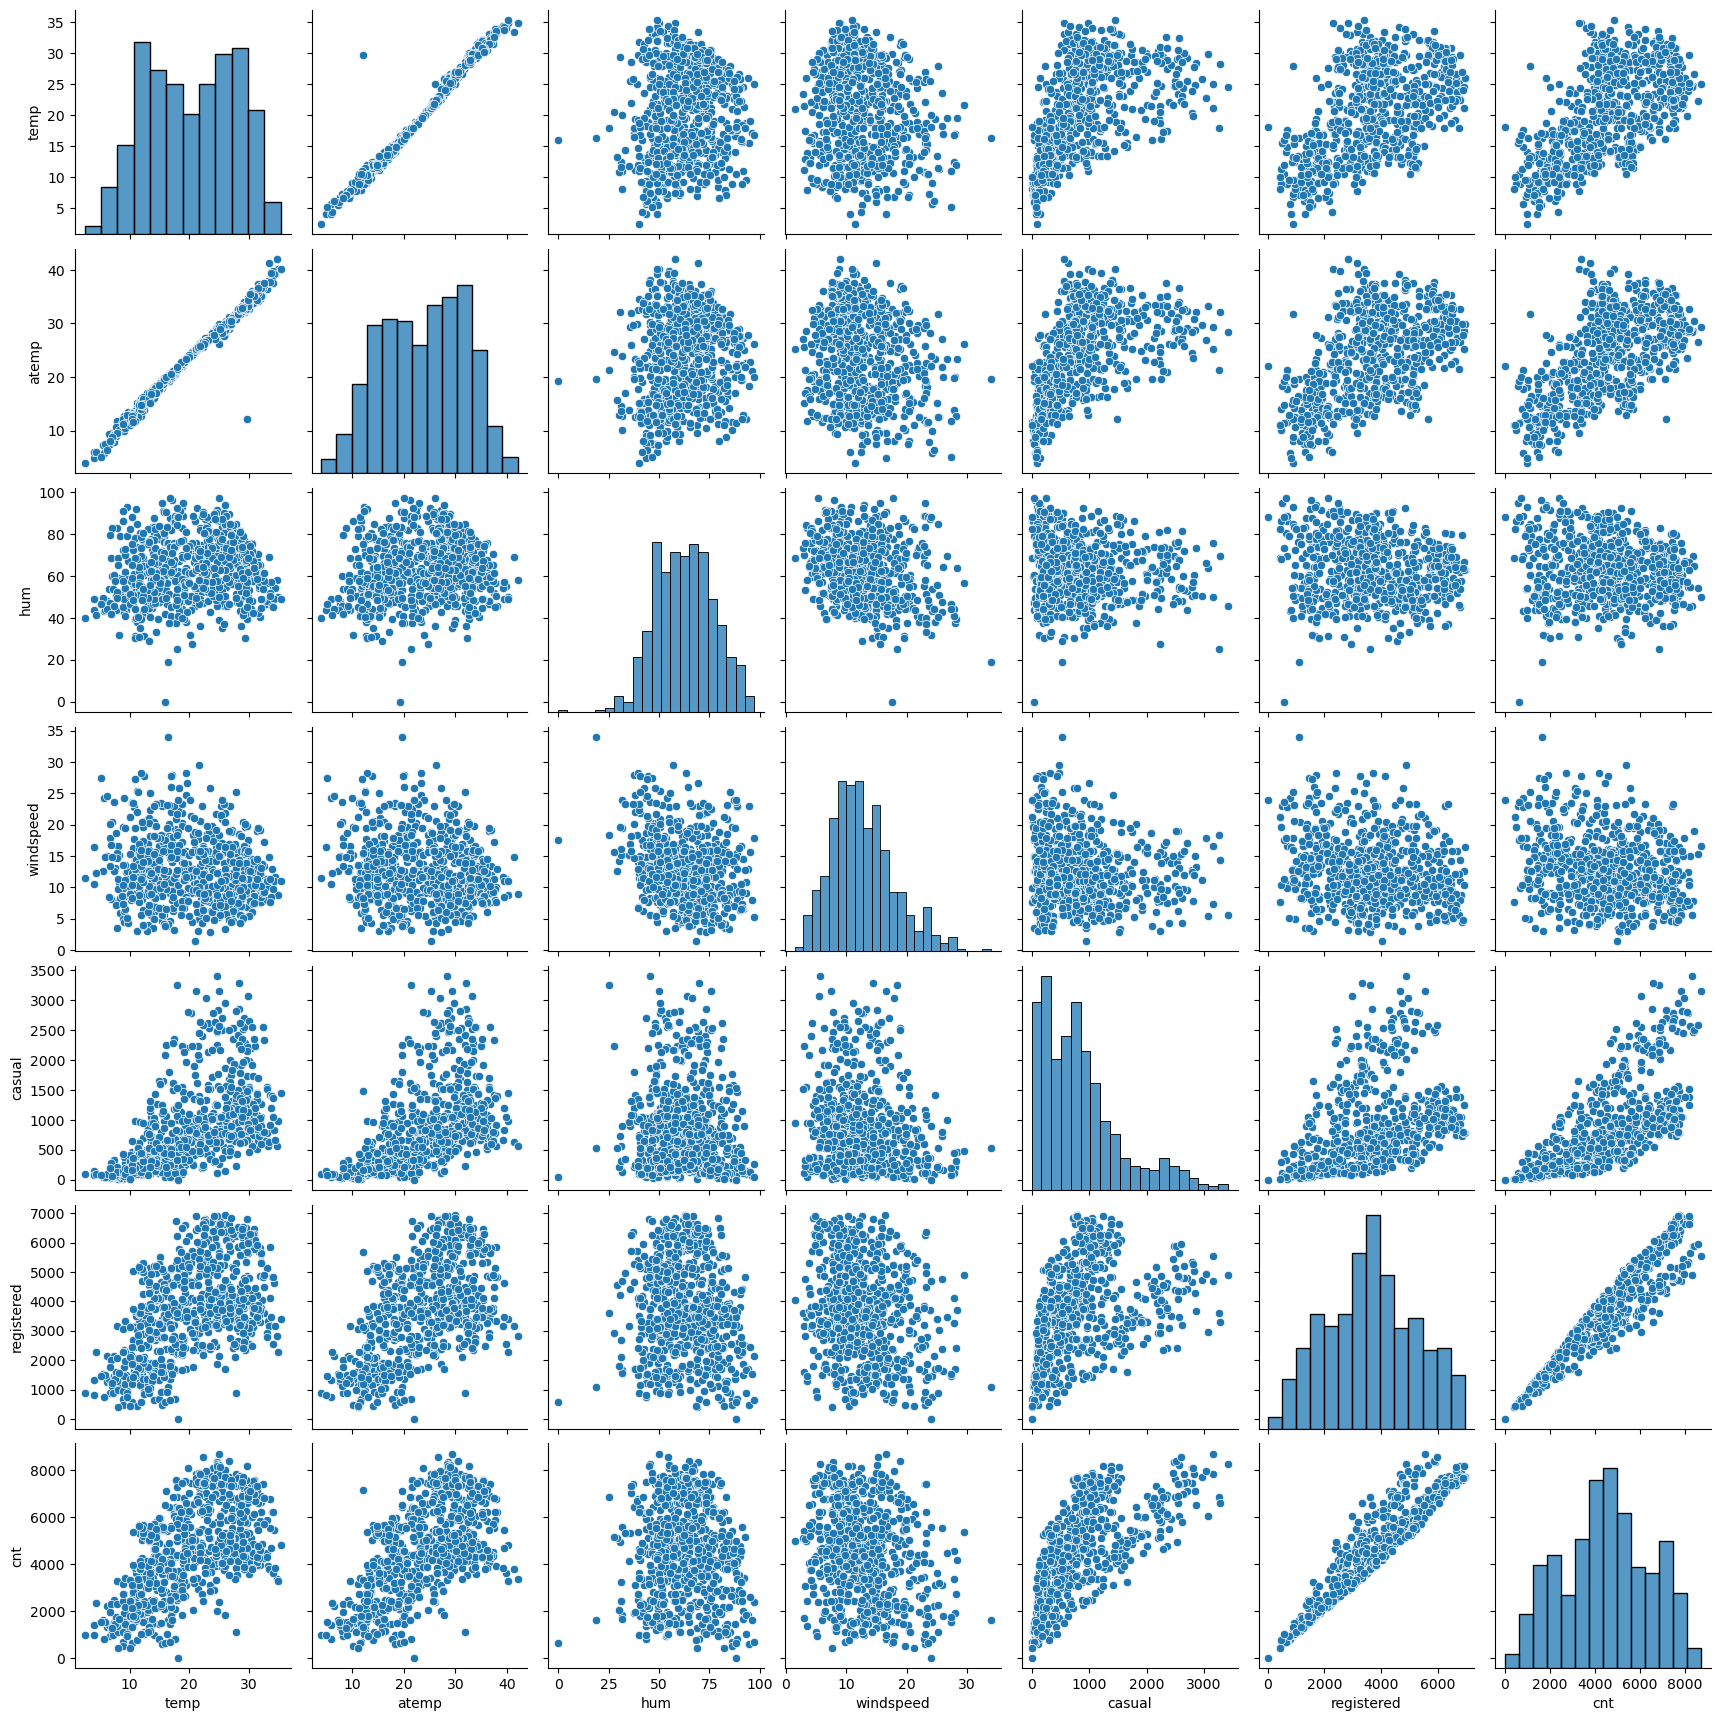

In [7]:
# Visualizing Multi collinearity between all variables
sns.pairplot(initial_data[cont_vars])
plt.show()

#### Observations by visualizing above Pair plot

We should be considering linear regression as Cnt has correlation with few columns like season, mnth, workingday, weathersittemp, atemp, hum, windspeed, casual, registered.

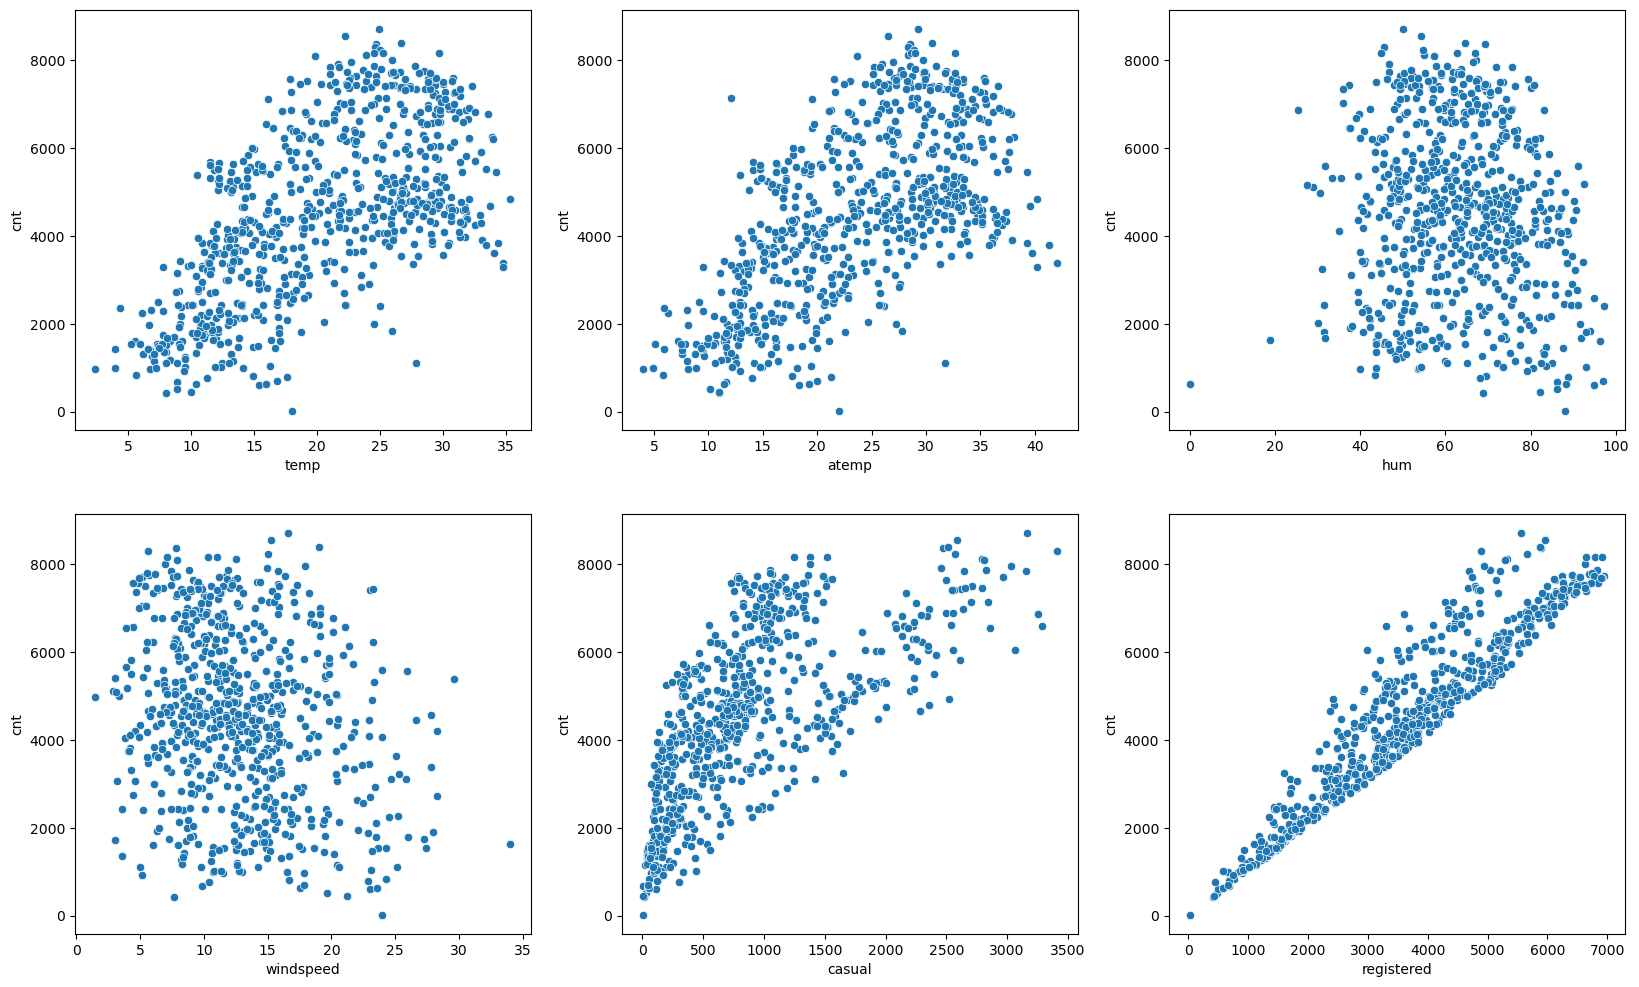

In [8]:
# Checking continous variables against cnt
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.scatterplot(data= initial_data, x='temp', y='cnt')
plt.subplot(2,3,2)
sns.scatterplot(data= initial_data, x='atemp', y='cnt')
plt.subplot(2,3,3)
sns.scatterplot(data= initial_data, x='hum', y='cnt')
plt.subplot(2,3,4)
sns.scatterplot(data= initial_data, x='windspeed', y='cnt')
plt.subplot(2,3,5)
sns.scatterplot(data= initial_data, x='casual', y='cnt')
plt.subplot(2,3,6)
sns.scatterplot(data= initial_data, x='registered', y='cnt')
plt.show()

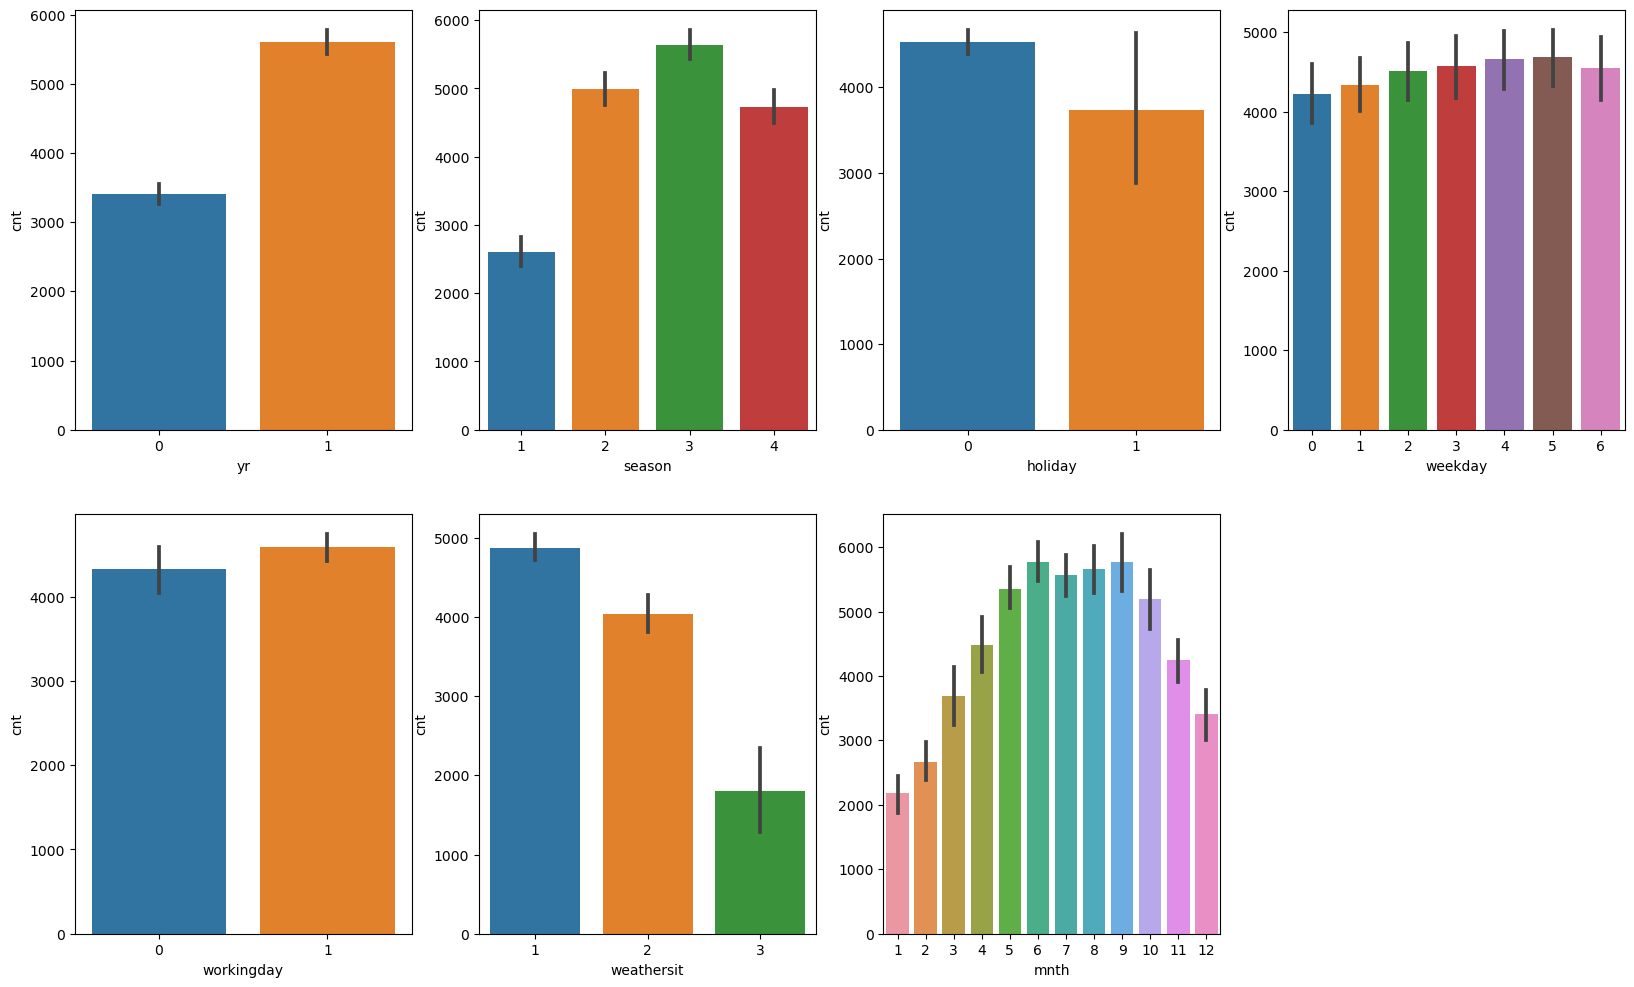

In [9]:
# Checking categorical variables against cnt
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.barplot(data= initial_data, x='yr', y='cnt')
plt.subplot(2,4,2)
sns.barplot(data= initial_data, x='season', y='cnt')
plt.subplot(2,4,3)
sns.barplot(data= initial_data, x='holiday', y='cnt')
plt.subplot(2,4,4)
sns.barplot(data= initial_data, x='weekday', y='cnt')
plt.subplot(2,4,5)
sns.barplot(data= initial_data, x='workingday', y='cnt')
plt.subplot(2,4,6)
sns.barplot(data= initial_data, x='weathersit', y='cnt')
plt.subplot(2,4,7)
sns.barplot(data= initial_data, x='mnth', y='cnt')
plt.show()

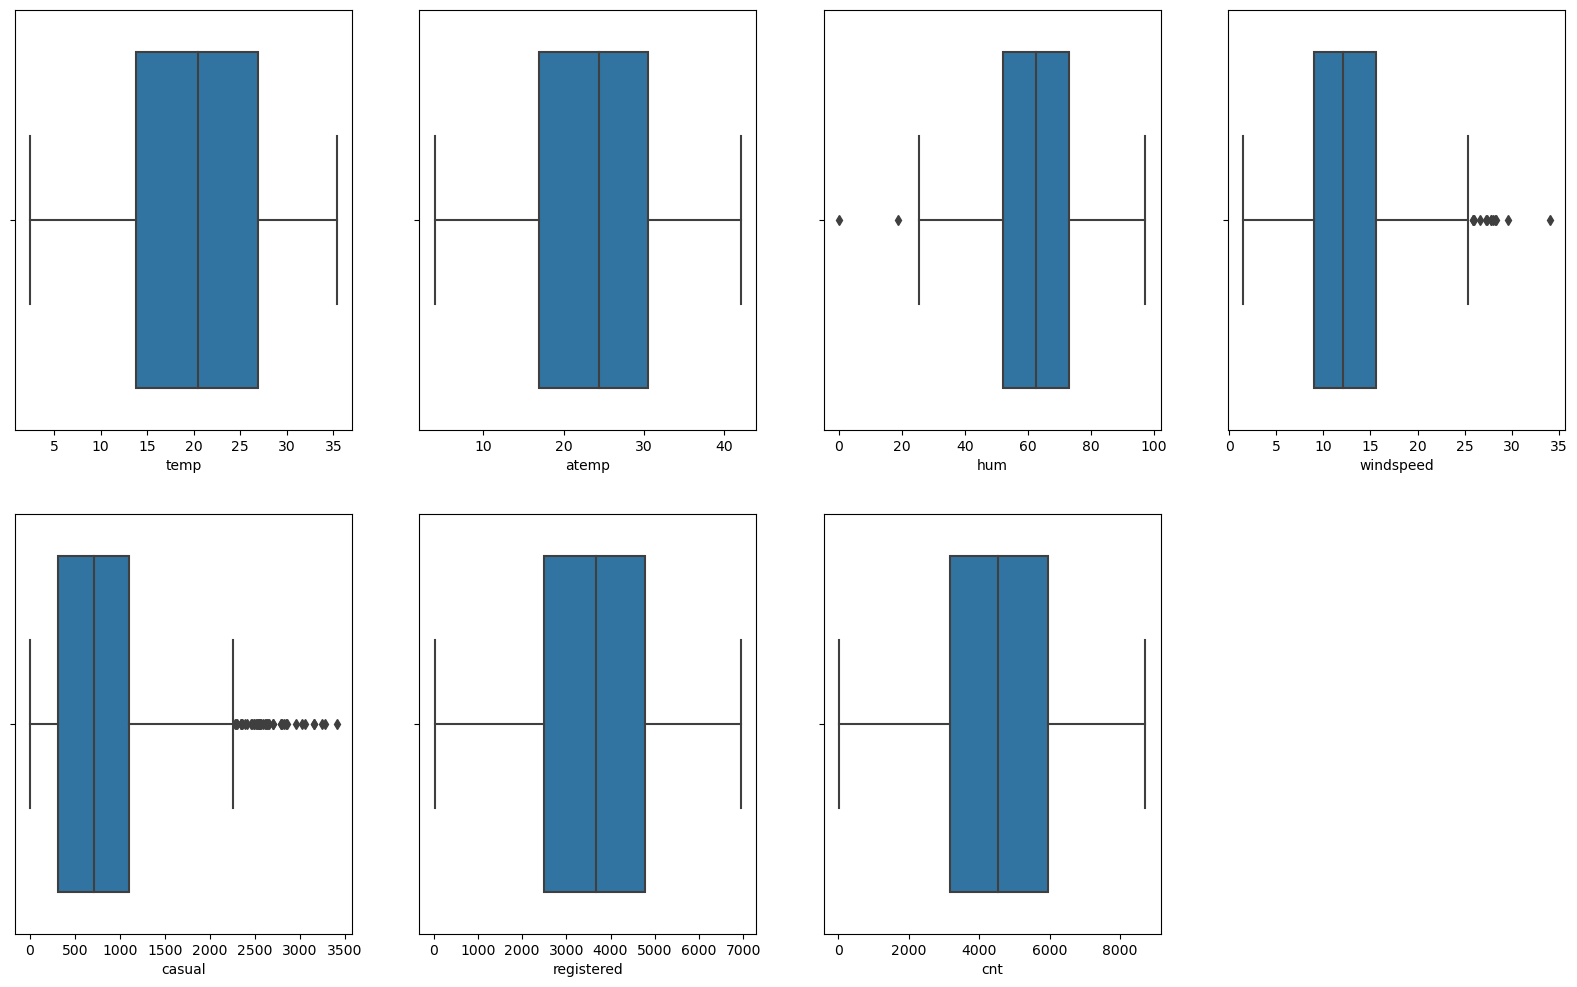

In [10]:
# Checking for outliers in continous variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(data= initial_data, x='temp')
plt.subplot(2,4,2)
sns.boxplot(data= initial_data, x='atemp')
plt.subplot(2,4,3)
sns.boxplot(data= initial_data, x='hum')
plt.subplot(2,4,4)
sns.boxplot(data= initial_data, x='windspeed')
plt.subplot(2,4,5)
sns.boxplot(data= initial_data, x='casual')
plt.subplot(2,4,6)
sns.boxplot(data= initial_data, x='registered')
plt.subplot(2,4,7)
sns.boxplot(data= initial_data, x='cnt')
plt.show()

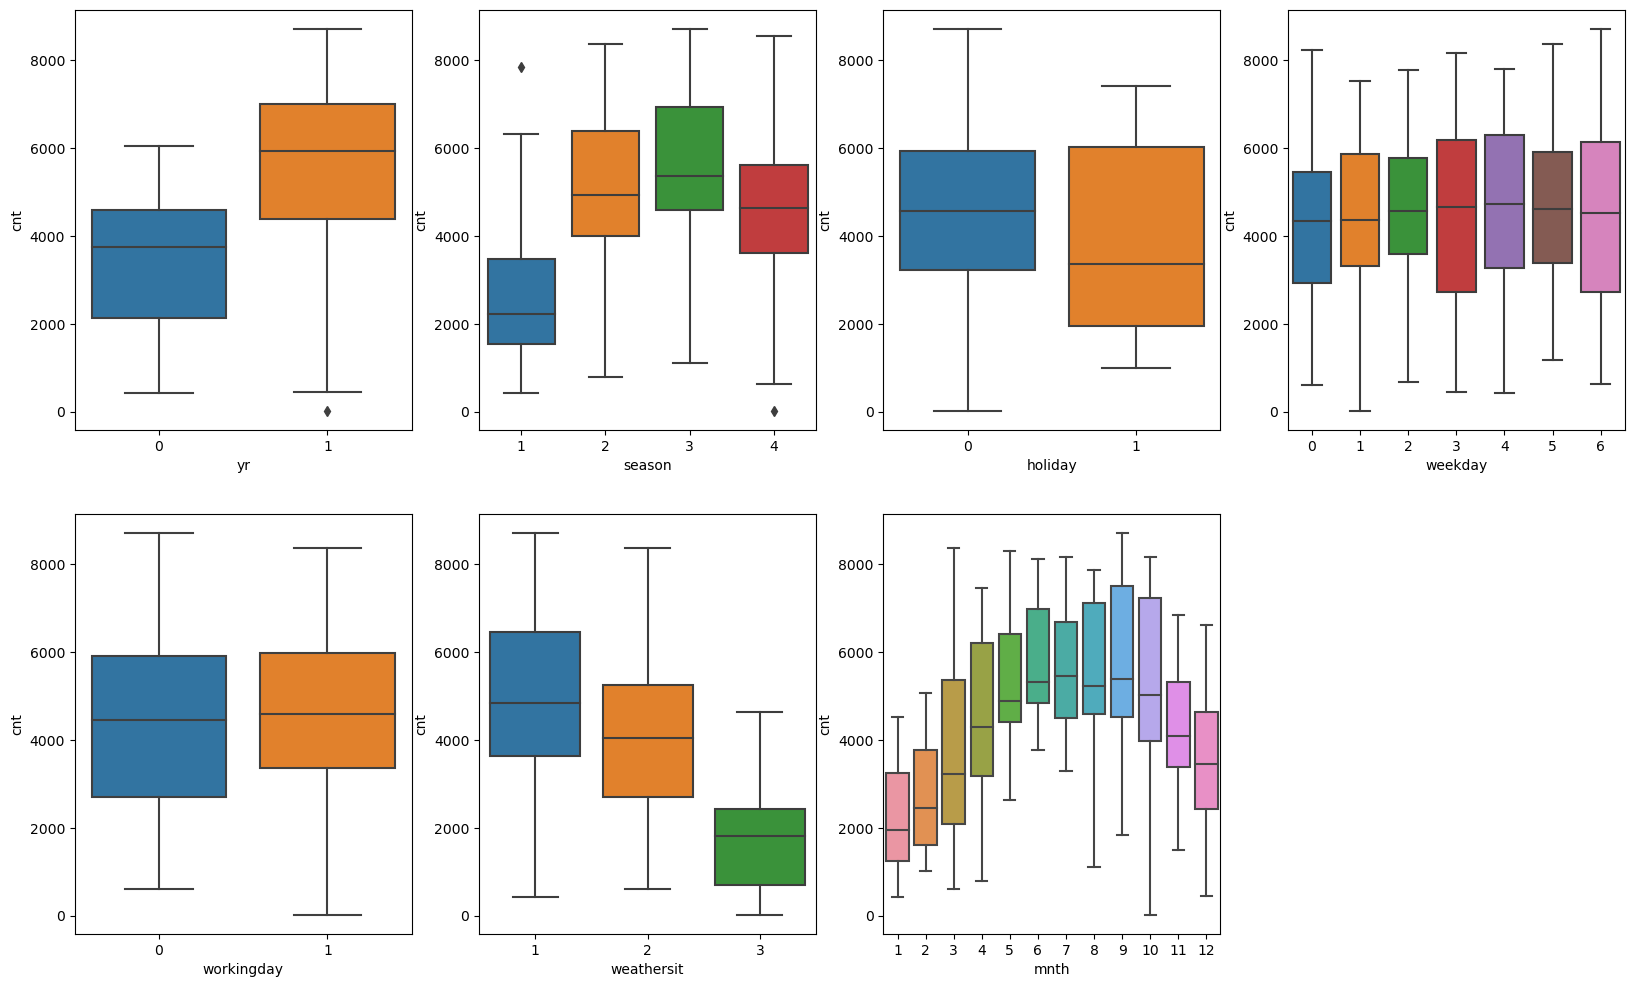

In [11]:
# Checking for outliers in continous variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(data= initial_data, x='yr', y='cnt')
plt.subplot(2,4,2)
sns.boxplot(data= initial_data, x='season', y='cnt')
plt.subplot(2,4,3)
sns.boxplot(data= initial_data, x='holiday', y='cnt')
plt.subplot(2,4,4)
sns.boxplot(data= initial_data, x='weekday', y='cnt')
plt.subplot(2,4,5)
sns.boxplot(data= initial_data, x='workingday', y='cnt')
plt.subplot(2,4,6)
sns.boxplot(data= initial_data, x='weathersit', y='cnt')
plt.subplot(2,4,7)
sns.boxplot(data= initial_data, x='mnth', y='cnt')
plt.show()

## Step 2: Data Preparation

In [12]:
# Removing outliers considering above category plots
initial_data = initial_data[~(initial_data['cnt'] < 25)]
initial_data.shape

(729, 16)

In [13]:
initial_data = initial_data[~((initial_data['season'] == 1) & (initial_data['cnt'] > 7000))]
initial_data.shape

(728, 16)

In [14]:
initial_data = initial_data[~(initial_data['hum'] < 20)]
initial_data.shape

(726, 16)

In [15]:
initial_data = initial_data[~(initial_data['windspeed'] > 29)]
initial_data.shape

(725, 16)

In [16]:
initial_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [17]:
# Droping Instant, casual and registered variable
initial_data = initial_data.drop(['instant','casual','registered'], axis=1)
initial_data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [18]:
# Converting the dteday column to datetime format
initial_data['dteday'] = pd.to_datetime(initial_data['dteday'], format='%d-%m-%Y')
initial_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# Derive the week_number from the date
initial_data['week_number'] = (initial_data.index//7)+1
initial_data.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,week_number
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1
5,2018-01-06,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606,1
6,2018-01-07,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510,1
7,2018-01-08,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959,2
8,2018-01-09,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822,2
9,2018-01-10,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321,2


In [20]:
initial_data.tail(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,week_number
720,2019-12-22,1,1,12,0,6,0,1,10.899153,11.80565,44.1250,27.292182,1749,103
721,2019-12-23,1,1,12,0,0,0,1,10.079153,12.97355,51.5417,8.916561,1787,104
722,2019-12-24,1,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,920,104
723,2019-12-25,1,1,12,1,2,0,2,11.943464,14.72325,73.4783,11.304642,1013,104
724,2019-12-26,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,441,104
725,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,104
726,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,104
727,2019-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,104
728,2019-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,105
729,2019-12-31,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,2729,105


In [21]:
# Creating dummy variable for weathersit and droping the main original column
weathersit_dummy = pd.get_dummies(initial_data['weathersit'], drop_first=True).rename(columns = {2:'misty', 3:'rainy'})
initial_data = pd.concat([initial_data,weathersit_dummy], axis=1)
initial_data = initial_data.drop('weathersit', axis=1)
initial_data

,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,week_number,misty,rainy
0,2018-01-01,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0
1,2018-01-02,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,0
2,2018-01-03,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,2018-01-04,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,2018-01-05,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,1,1,12,0,4,1,10.420847,11.33210,65.2917,23.458911,2114,104,1,0
726,2019-12-28,1,1,12,0,5,1,10.386653,12.75230,59.0000,10.416557,3095,104,1,0
727,2019-12-29,1,1,12,0,6,0,10.386653,12.12000,75.2917,8.333661,1341,104,1,0
728,2019-12-30,1,1,12,0,0,0,10.489153,11.58500,48.3333,23.500518,1796,105,0,0


In [22]:
initial_data['week_day_derived'] = initial_data['dteday'].dt.dayofweek
initial_data

,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,week_number,misty,rainy,week_day_derived
0,2018-01-01,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0
1,2018-01-02,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,0,1
2,2018-01-03,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,2
3,2018-01-04,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,3
4,2018-01-05,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,1,1,12,0,4,1,10.420847,11.33210,65.2917,23.458911,2114,104,1,0,4
726,2019-12-28,1,1,12,0,5,1,10.386653,12.75230,59.0000,10.416557,3095,104,1,0,5
727,2019-12-29,1,1,12,0,6,0,10.386653,12.12000,75.2917,8.333661,1341,104,1,0,6
728,2019-12-30,1,1,12,0,0,0,10.489153,11.58500,48.3333,23.500518,1796,105,0,0,0


#### Comment
Date 2018-01-02 (Index 2) is a Tuesday, which is mentioned as 0 in Weekday. But when you check 2019-12-30 (Index 728) is also mentioned as 0 which is Monday.
This indicates that data in weekday is wrong.
This implies there is a necessity to derived a weekday column by using dteday column.

In [23]:
# Creating dummy variable for weekday and droping the original column
weekday_dummy = pd.get_dummies(initial_data['week_day_derived'], drop_first=True) \
.rename(columns = {1: 'tue', 2:'wed', 3:'thur', 4:'fri', 5:'sat', 6:'sun'})
initial_data = pd.concat([initial_data,weekday_dummy], axis=1)
initial_data = initial_data.drop(['weekday','week_day_derived'], axis=1)
initial_data

,dteday,season,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,week_number,misty,rainy,tue,wed,thur,fri,sat,sun
0,2018-01-01,1,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,0,0,0
1,2018-01-02,1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,0,1,0,0,0,0,0
2,2018-01-03,1,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0
3,2018-01-04,1,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,1,0,0,0
4,2018-01-05,1,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,1,1,12,0,1,10.420847,11.33210,65.2917,23.458911,2114,104,1,0,0,0,0,1,0,0
726,2019-12-28,1,1,12,0,1,10.386653,12.75230,59.0000,10.416557,3095,104,1,0,0,0,0,0,1,0
727,2019-12-29,1,1,12,0,0,10.386653,12.12000,75.2917,8.333661,1341,104,1,0,0,0,0,0,0,1
728,2019-12-30,1,1,12,0,0,10.489153,11.58500,48.3333,23.500518,1796,105,0,0,0,0,0,0,0,0


In [24]:
# Creating dummy variable for season and droping the original column
season_dummy = pd.get_dummies(initial_data['season'], drop_first=True) \
.rename(columns = {2:'summer', 3:'fall', 4:'winter'})
initial_data = pd.concat([initial_data,season_dummy], axis=1)
initial_data = initial_data.drop(['season'], axis=1)
initial_data

,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,week_number,misty,rainy,tue,wed,thur,fri,sat,sun,summer,fall,winter
0,2018-01-01,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,0,0,0,0,0,0
1,2018-01-02,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,0,1,0,0,0,0,0,0,0,0
2,2018-01-03,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,0
3,2018-01-04,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,1,0,0,0,0,0,0
4,2018-01-05,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,1,12,0,1,10.420847,11.33210,65.2917,23.458911,2114,104,1,0,0,0,0,1,0,0,0,0,0
726,2019-12-28,1,12,0,1,10.386653,12.75230,59.0000,10.416557,3095,104,1,0,0,0,0,0,1,0,0,0,0
727,2019-12-29,1,12,0,0,10.386653,12.12000,75.2917,8.333661,1341,104,1,0,0,0,0,0,0,1,0,0,0
728,2019-12-30,1,12,0,0,10.489153,11.58500,48.3333,23.500518,1796,105,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Creating dummy variable for mnth and droping the original column
mnth_dummy = pd.get_dummies(initial_data['mnth'], drop_first=True) \
.rename(columns = {2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
initial_data = pd.concat([initial_data,mnth_dummy], axis=1)
initial_data = initial_data.drop(['mnth'], axis=1)
initial_data

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,week_number,misty,rainy,tue,wed,thur,fri,sat,sun,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-01-04,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-01-05,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,104,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
726,2019-12-28,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,104,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
727,2019-12-29,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,104,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
728,2019-12-30,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


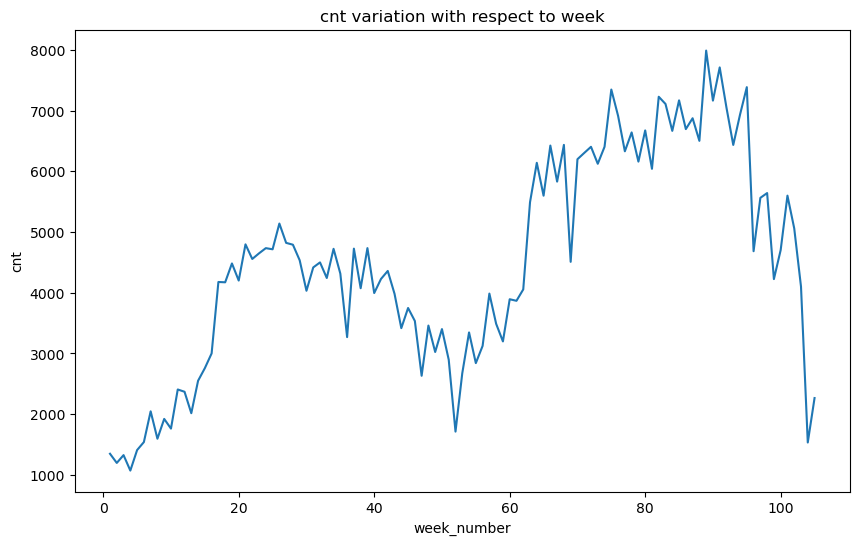

In [26]:
# Visualizing week vs cnt
plt.figure(figsize = (10,6))
sns.lineplot(data= initial_data, x='week_number', y='cnt', ci=None)
plt.title("cnt variation with respect to week")
plt.xlabel('week_number')
plt.ylabel('cnt')
plt.show()

In [27]:
# Spliting data into traing data and testing data
train_data, test_data = train_test_split(initial_data, train_size=0.7, random_state=100)

In [28]:
print(train_data.shape)
print(test_data.shape)

(507, 32)
(218, 32)


In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 641 to 524
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dteday       507 non-null    datetime64[ns]
 1   yr           507 non-null    int64         
 2   holiday      507 non-null    int64         
 3   workingday   507 non-null    int64         
 4   temp         507 non-null    float64       
 5   atemp        507 non-null    float64       
 6   hum          507 non-null    float64       
 7   windspeed    507 non-null    float64       
 8   cnt          507 non-null    int64         
 9   week_number  507 non-null    int64         
 10  misty        507 non-null    uint8         
 11  rainy        507 non-null    uint8         
 12  tue          507 non-null    uint8         
 13  wed          507 non-null    uint8         
 14  thur         507 non-null    uint8         
 15  fri          507 non-null    uint8         
 16  sat   

In [30]:
# Rescaling the features using min-max (Normalization) as this will handle Outliers that was observed in out step 1
scaler = MinMaxScaler()

# Creating numerical variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'week_number']

# Fit and Transform the train dataset
train_data[num_vars] = scaler.fit_transform(train_data[num_vars])

In [31]:
train_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,week_number,misty,rainy,tue,wed,thur,fri,sat,sun,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,0.504931,0.031558,0.674556,0.537624,0.522174,0.496663,0.388664,0.494670,0.501878,0.360947,0.019724,0.140039,0.153846,0.124260,0.138067,0.138067,0.161736,0.240631,0.260355,0.252465,0.071006,0.088757,0.072978,0.090730,0.074951,0.078895,0.088757,0.084813,0.078895,0.096647,0.084813
std,0.500469,0.174993,0.469003,0.226609,0.215588,0.207486,0.197609,0.235916,0.290505,0.480749,0.139187,0.347371,0.361158,0.330204,0.345311,0.345311,0.368572,0.427889,0.439262,0.434856,0.257088,0.284674,0.260358,0.287508,0.263572,0.269842,0.284674,0.278878,0.269842,0.295768,0.278878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332844,0.329253,0.335112,0.244230,0.322830,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.530654,0.528632,0.489011,0.368845,0.492092,0.509615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.706466,0.648657,0.502118,0.673729,0.754808,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
train_data = train_data.drop('dteday',axis=1)
train_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,week_number,misty,rainy,tue,wed,thur,fri,sat,sun,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
641,1,0,1,0.745598,0.707754,0.634311,0.198350,0.832669,0.875000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.204242,0.283272,0.813127,0.164795,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
478,1,0,1,0.441354,0.436522,0.240538,0.545896,0.628033,0.653846,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
113,0,0,0,0.651106,0.632534,0.763125,0.395085,0.453942,0.153846,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
685,1,0,0,0.331287,0.330942,0.374237,0.362276,0.627550,0.932692,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## Step 3: Building the model

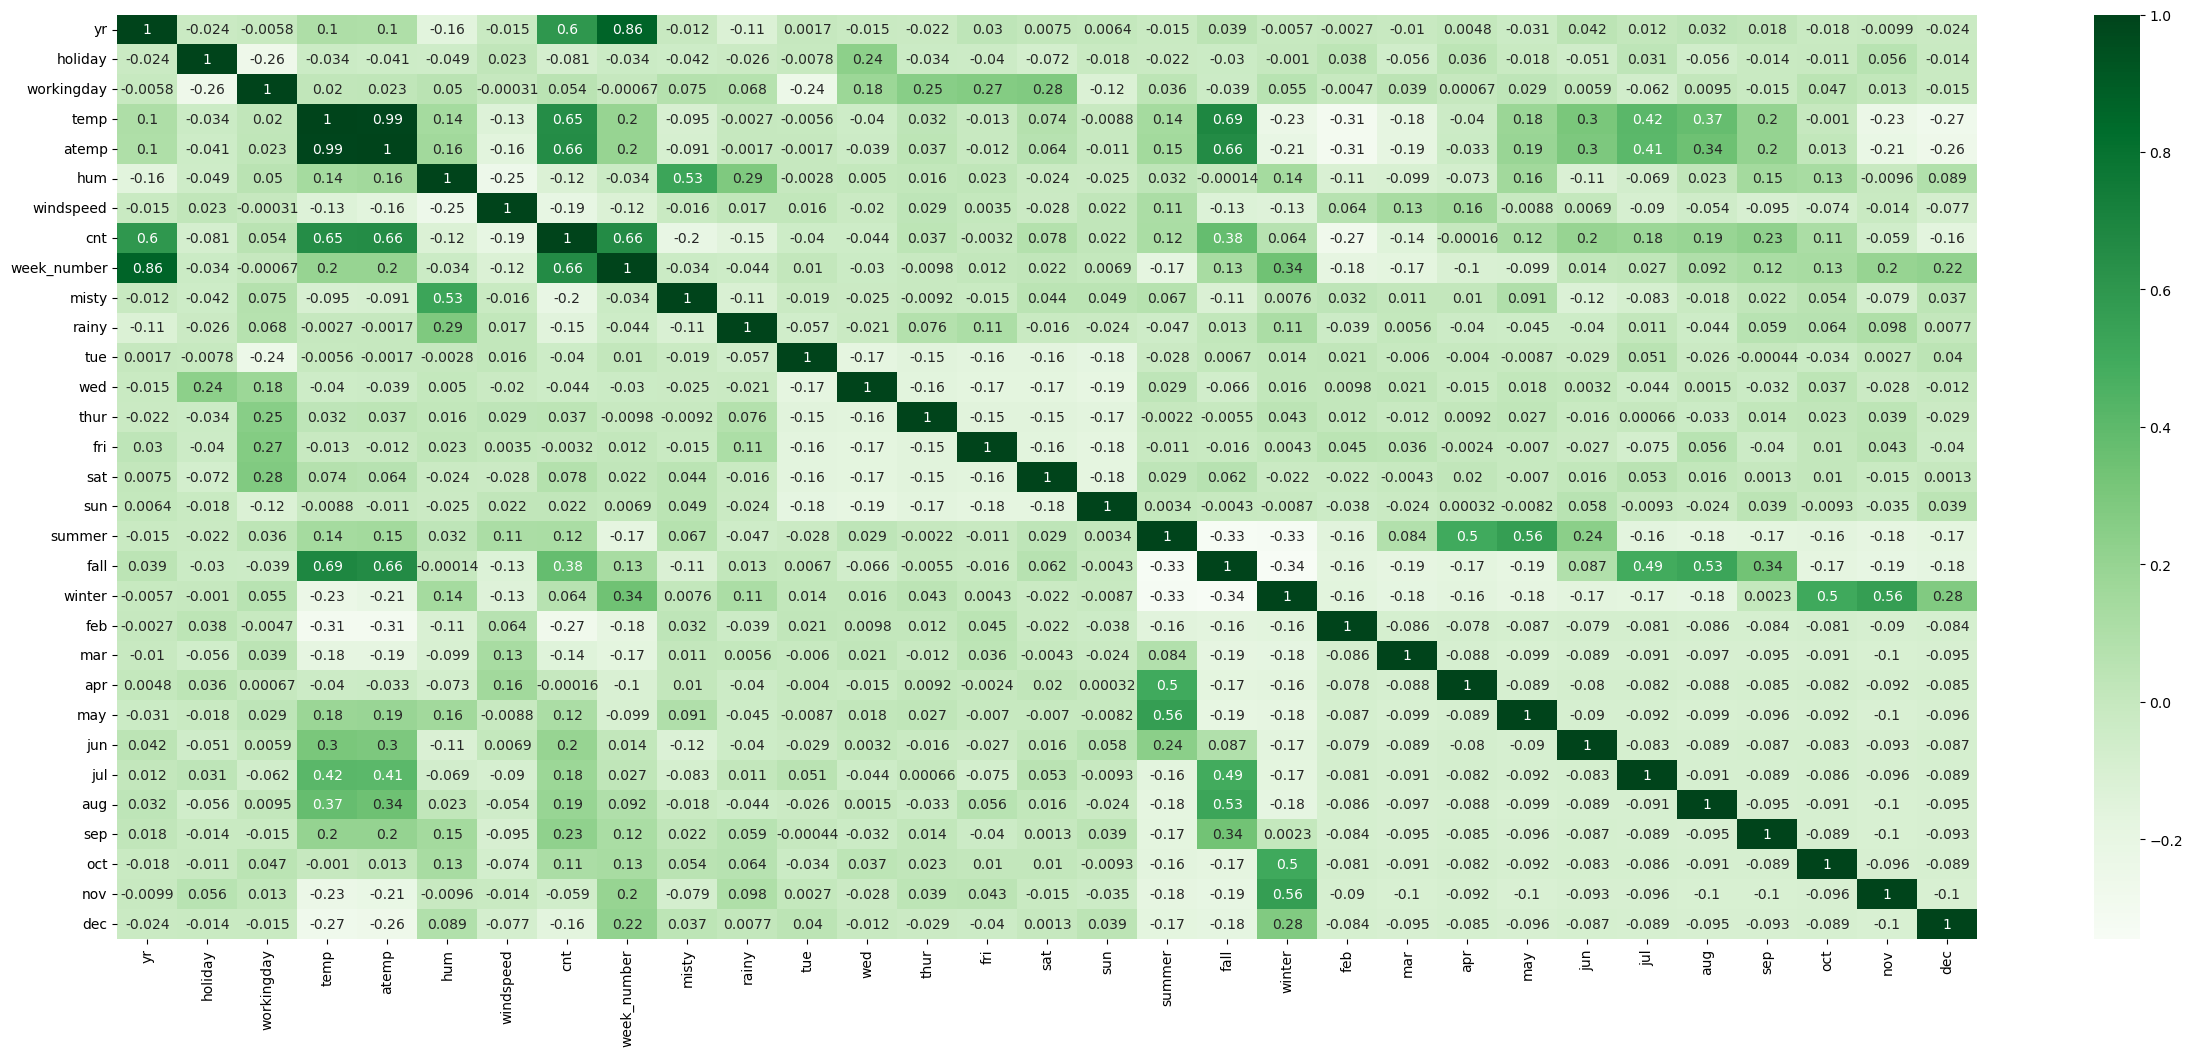

In [33]:
# Creating an heatmap of correlation
plt.figure(figsize=(30,12))
sns.heatmap(train_data.corr(), cmap='Greens', annot=True)
plt.show()

In [34]:
# Dividing into X and y sets
y_train = train_data.pop('cnt')
X_train = train_data

In [35]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,week_number,misty,rainy,tue,wed,thur,fri,sat,sun,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
641,1,0,1,0.745598,0.707754,0.634311,0.198350,0.875000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.204242,0.283272,0.813127,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
478,1,0,1,0.441354,0.436522,0.240538,0.545896,0.653846,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
113,0,0,0,0.651106,0.632534,0.763125,0.395085,0.153846,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
685,1,0,0,0.331287,0.330942,0.374237,0.362276,0.932692,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [36]:
y_train.head()

641    0.832669
728    0.164795
478    0.628033
113    0.453942
685    0.627550
Name: cnt, dtype: float64

### Feature selection using Recursive Feature Elimination (RFE)

In [37]:
# Building model using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of variables equal to 8
lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr)
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', False, 2),
 ('holiday', False, 7),
 ('workingday', False, 14),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('week_number', True, 1),
 ('misty', False, 8),
 ('rainy', False, 4),
 ('tue', False, 10),
 ('wed', False, 15),
 ('thur', False, 11),
 ('fri', False, 16),
 ('sat', False, 12),
 ('sun', False, 13),
 ('summer', False, 5),
 ('fall', False, 6),
 ('winter', True, 1),
 ('feb', False, 9),
 ('mar', False, 3),
 ('apr', True, 1),
 ('may', True, 1),
 ('jun', True, 1),
 ('jul', True, 1),
 ('aug', True, 1),
 ('sep', True, 1),
 ('oct', True, 1),
 ('nov', True, 1),
 ('dec', True, 1)]

### Building model-1 using StatsModel

In [40]:
# Choosing top 4 variables
vars_model = ['yr','holiday','temp','hum','windspeed','rainy','summer',
            'winter','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

# adding constant
X_train_sm = sm.add_constant(X_train[vars_model])

# creating model-1
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     147.7
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.83e-184
Time:                        21:22:24   Log-Likelihood:                 485.87
No. Observations:                 507   AIC:                            -933.7
Df Residuals:                     488   BIC:                            -853.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1460      0.022      6.771      0.000       0.104       0.188
yr             0.2354      0.009     26.918      0.000       0.218       0.253
holiday       -0.0575      0.024     -2.357      0.019      -0.106      -0.010
temp           0.5512      0.048     11.511      0.000       0.457       0.645
hum           -0.2434      0.024    -10.145      0.000      -0.291      -0.196
windspeed     -0.1464      0.023     -6.407      0.000      -0.191      -0.102
rainy         -0.1037      0.032     -3.220      0.001      -0.167      -0.040
summer         0.0649      0.022      2.979      0.003       0.022       0.108
winter         0.1437      0.022      6.403      0.000       0.100       0.188
mar            0.0565      0.021      2.688      0.007       0.015       0.098
apr            0.0684      0.032      2.117      0.035       0.005       0.132
may            0.0981      0.036      2.762      0.006       0.028       0.168
jun            0.0680      0.035      1.924      0.055      -0.001       0.137
jul            0.0560      0.034      1.632      0.103      -0.011       0.124
aug            0.0961      0.032      3.042      0.002       0.034       0.158
sep            0.1812      0.028      6.561      0.000       0.127       0.235
oct            0.0890      0.032      2.807      0.005       0.027       0.151
nov            0.0218      0.029      0.756      0.450      -0.035       0.078
dec            0.0220      0.023      0.939      0.348      -0.024       0.068
==============================================================================
Omnibus:                       93.567   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.614
Skew:                          -0.983   Prob(JB):                     6.11e-45
Kurtosis:                       5.402   Cond. No.                         29.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Calculating VIF for the above model-1
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,const,26.33
3,temp,6.66
11,may,5.90
8,winter,5.39
12,jun,4.91
7,summer,4.91
13,jul,4.85
14,aug,4.58
16,oct,4.14
17,nov,4.11


### Model 2

In [42]:
# removed nov from the list
vars_model = ['yr','holiday','temp','hum','windspeed','rainy','summer',
            'winter','mar','apr','may','jun','jul','aug','sep','oct','dec']


# adding constant
X_train_sm = sm.add_constant(X_train[vars_model])

# creating model-2
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.96e-185
Time:                        21:22:24   Log-Likelihood:                 485.57
No. Observations:                 507   AIC:                            -935.1
Df Residuals:                     489   BIC:                            -859.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1473      0.021      6.861      0.000       0.105       0.190
yr             0.2350      0.009     26.934      0.000       0.218       0.252
holiday       -0.0570      0.024     -2.338      0.020      -0.105      -0.009
temp           0.5583      0.047     11.899      0.000       0.466       0.650
hum           -0.2439      0.024    -10.175      0.000      -0.291      -0.197
windspeed     -0.1462      0.023     -6.399      0.000      -0.191      -0.101
rainy         -0.1021      0.032     -3.178      0.002      -0.165      -0.039
summer         0.0652      0.022      2.998      0.003       0.022       0.108
winter         0.1568      0.014     11.043      0.000       0.129       0.185
mar            0.0524      0.020      2.582      0.010       0.013       0.092
apr            0.0633      0.032      2.004      0.046       0.001       0.125
may            0.0920      0.035      2.661      0.008       0.024       0.160
jun            0.0612      0.034      1.791      0.074      -0.006       0.128
jul            0.0488      0.033      1.481      0.139      -0.016       0.114
aug            0.0894      0.030      2.949      0.003       0.030       0.149
sep            0.1719      0.025      6.953      0.000       0.123       0.221
oct            0.0710      0.021      3.398      0.001       0.030       0.112
dec            0.0100      0.017      0.581      0.561      -0.024       0.044
==============================================================================
Omnibus:                       90.656   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.094
Skew:                          -0.961   Prob(JB):                     7.13e-43
Kurtosis:                       5.343   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Calculating VIF for the above model-1
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,const,26.15
3,temp,6.40
11,may,5.59
7,summer,4.91
12,jun,4.59
13,jul,4.48
14,aug,4.21
10,apr,3.83
15,sep,2.69
8,winter,2.16


### Model-3

In [44]:
# removed dec from the list
vars_model = ['yr','holiday','temp','hum','windspeed','rainy','summer',
            'winter','mar','apr','may','jun','jul','aug','sep','oct']

# adding constant
X_train_sm = sm.add_constant(X_train[vars_model])

# creating model-3
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     166.5
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.67e-186
Time:                        21:22:24   Log-Likelihood:                 485.40
No. Observations:                 507   AIC:                            -936.8
Df Residuals:                     490   BIC:                            -864.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1486      0.021      6.963      0.000       0.107       0.191
yr             0.2349      0.009     26.948      0.000       0.218       0.252
holiday       -0.0577      0.024     -2.367      0.018      -0.106      -0.010
temp           0.5586      0.047     11.915      0.000       0.467       0.651
hum           -0.2425      0.024    -10.177      0.000      -0.289      -0.196
windspeed     -0.1468      0.023     -6.436      0.000      -0.192      -0.102
rainy         -0.1030      0.032     -3.212      0.001      -0.166      -0.040
summer         0.0652      0.022      2.996      0.003       0.022       0.108
winter         0.1584      0.014     11.377      0.000       0.131       0.186
mar            0.0507      0.020      2.526      0.012       0.011       0.090
apr            0.0617      0.031      1.961      0.050      -0.000       0.123
may            0.0900      0.034      2.617      0.009       0.022       0.157
jun            0.0594      0.034      1.746      0.081      -0.007       0.126
jul            0.0469      0.033      1.430      0.153      -0.018       0.111
aug            0.0873      0.030      2.903      0.004       0.028       0.146
sep            0.1694      0.024      6.964      0.000       0.122       0.217
oct            0.0673      0.020      3.382      0.001       0.028       0.106
==============================================================================
Omnibus:                       90.182   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.804
Skew:                          -0.955   Prob(JB):                     8.24e-43
Kurtosis:                       5.351   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Calculating VIF for the above model-1
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,const,25.87
3,temp,6.40
11,may,5.54
7,summer,4.91
12,jun,4.55
13,jul,4.43
14,aug,4.16
10,apr,3.80
15,sep,2.61
8,winter,2.08


### Model-4

In [46]:
# removing july from the list
vars_model = ['yr','holiday','temp','hum','windspeed','rainy','summer',
            'winter','mar','apr','may','jun','aug','sep','oct']
# adding constant
X_train_sm = sm.add_constant(X_train[vars_model])

# creating model-4
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 10 May 2023   Prob (F-statistic):          5.43e-187
Time:                        21:22:24   Log-Likelihood:                 484.34
No. Observations:                 507   AIC:                            -936.7
Df Residuals:                     491   BIC:                            -869.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1425      0.021      6.807      0.000       0.101       0.184
yr             0.2331      0.009     26.997      0.000       0.216       0.250
holiday       -0.0606      0.024     -2.495      0.013      -0.108      -0.013
temp           0.6150      0.025     24.185      0.000       0.565       0.665
hum           -0.2496      0.023    -10.703      0.000      -0.295      -0.204
windspeed     -0.1495      0.023     -6.576      0.000      -0.194      -0.105
rainy         -0.1017      0.032     -3.170      0.002      -0.165      -0.039
summer         0.0688      0.022      3.179      0.002       0.026       0.111
winter         0.1504      0.013     11.792      0.000       0.125       0.175
mar            0.0380      0.018      2.110      0.035       0.003       0.073
apr            0.0414      0.028      1.473      0.141      -0.014       0.097
may            0.0612      0.028      2.193      0.029       0.006       0.116
jun            0.0246      0.024      1.034      0.302      -0.022       0.071
aug            0.0536      0.019      2.864      0.004       0.017       0.090
sep            0.1450      0.017      8.353      0.000       0.111       0.179
oct            0.0573      0.019      3.071      0.002       0.021       0.094
==============================================================================
Omnibus:                       82.857   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.797
Skew:                          -0.911   Prob(JB):                     9.95e-37
Kurtosis:                       5.128   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Calculating VIF for the above model-1
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,const,24.82
7,summer,4.84
11,may,3.64
10,apr,3.03
12,jun,2.23
3,temp,1.88
8,winter,1.74
13,aug,1.61
9,mar,1.49
15,oct,1.43


### Model-5

In [48]:
# removed jun from the list
vars_model = ['yr','holiday','temp','hum','windspeed','rainy','summer',
            'winter','mar','apr','may','aug','sep','oct']

# adding constant
X_train_sm = sm.add_constant(X_train[vars_model])

# creating model-5
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     189.7
Date:                Wed, 10 May 2023   Prob (F-statistic):          6.59e-188
Time:                        21:22:24   Log-Likelihood:                 483.79
No. Observations:                 507   AIC:                            -937.6
Df Residuals:                     492   BIC:                            -874.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1414      0.021      6.765      0.000       0.100       0.182
yr             0.2329      0.009     26.981      0.000       0.216       0.250
holiday       -0.0626      0.024     -2.583      0.010      -0.110      -0.015
temp           0.6257      0.023     26.951      0.000       0.580       0.671
hum           -0.2520      0.023    -10.857      0.000      -0.298      -0.206
windspeed     -0.1487      0.023     -6.542      0.000      -0.193      -0.104
rainy         -0.1029      0.032     -3.209      0.001      -0.166      -0.040
summer         0.0817      0.018      4.641      0.000       0.047       0.116
winter         0.1488      0.013     11.752      0.000       0.124       0.174
mar            0.0309      0.017      1.854      0.064      -0.002       0.064
apr            0.0249      0.023      1.076      0.283      -0.021       0.070
may            0.0433      0.022      1.978      0.049       0.000       0.086
aug            0.0470      0.018      2.671      0.008       0.012       0.082
sep            0.1404      0.017      8.368      0.000       0.107       0.173
oct            0.0554      0.019      2.986      0.003       0.019       0.092
==============================================================================
Omnibus:                       81.933   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.297
Skew:                          -0.911   Prob(JB):                     1.56e-35
Kurtosis:                       5.067   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Calculating VIF for the above model-1
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,const,24.76
7,summer,3.21
11,may,2.24
10,apr,2.05
8,winter,1.71
3,temp,1.57
12,aug,1.42
14,oct,1.42
4,hum,1.31
9,mar,1.27


### Model-6

In [50]:
# removing apr from the list
vars_model = ['yr','holiday','temp','hum','windspeed','rainy','summer',
            'winter','mar','may','aug','sep','oct']

# adding constant
X_train_sm = sm.add_constant(X_train[vars_model])

# creating model-6
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.1
Date:                Wed, 10 May 2023   Prob (F-statistic):          8.04e-189
Time:                        21:22:24   Log-Likelihood:                 483.19
No. Observations:                 507   AIC:                            -938.4
Df Residuals:                     493   BIC:                            -879.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1426      0.021      6.830      0.000       0.102       0.184
yr             0.2331      0.009     26.994      0.000       0.216       0.250
holiday       -0.0616      0.024     -2.544      0.011      -0.109      -0.014
temp           0.6223      0.023     27.054      0.000       0.577       0.668
hum           -0.2515      0.023    -10.838      0.000      -0.297      -0.206
windspeed     -0.1463      0.023     -6.467      0.000      -0.191      -0.102
rainy         -0.1039      0.032     -3.243      0.001      -0.167      -0.041
summer         0.0943      0.013      7.181      0.000       0.069       0.120
winter         0.1478      0.013     11.704      0.000       0.123       0.173
mar            0.0252      0.016      1.596      0.111      -0.006       0.056
may            0.0305      0.018      1.659      0.098      -0.006       0.067
aug            0.0475      0.018      2.695      0.007       0.013       0.082
sep            0.1407      0.017      8.387      0.000       0.108       0.174
oct            0.0559      0.019      3.013      0.003       0.019       0.092
==============================================================================
Omnibus:                       82.803   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.293
Skew:                          -0.921   Prob(JB):                     9.45e-36
Kurtosis:                       5.059   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Calculating VIF for the above model-1
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,const,24.69
7,summer,1.79
8,winter,1.71
10,may,1.58
3,temp,1.54
11,aug,1.42
13,oct,1.42
4,hum,1.31
12,sep,1.24
9,mar,1.14


### Model-7

In [52]:
# removing may from the list
vars_model = ['yr','holiday','temp','hum','windspeed','rainy','summer',
            'winter','may','aug','sep','oct']

# adding constant
X_train_sm = sm.add_constant(X_train[vars_model])

# creating model-7
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     220.2
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.88e-189
Time:                        21:22:24   Log-Likelihood:                 481.89
No. Observations:                 507   AIC:                            -937.8
Df Residuals:                     494   BIC:                            -882.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1484      0.021      7.208      0.000       0.108       0.189
yr             0.2332      0.009     26.967      0.000       0.216       0.250
holiday       -0.0644      0.024     -2.664      0.008      -0.112      -0.017
temp           0.6167      0.023     27.082      0.000       0.572       0.661
hum           -0.2517      0.023    -10.826      0.000      -0.297      -0.206
windspeed     -0.1444      0.023     -6.383      0.000      -0.189      -0.100
rainy         -0.1025      0.032     -3.195      0.001      -0.166      -0.039
summer         0.0961      0.013      7.328      0.000       0.070       0.122
winter         0.1439      0.012     11.599      0.000       0.119       0.168
may            0.0260      0.018      1.429      0.154      -0.010       0.062
aug            0.0454      0.018      2.584      0.010       0.011       0.080
sep            0.1391      0.017      8.294      0.000       0.106       0.172
oct            0.0565      0.019      3.036      0.003       0.020       0.093
==============================================================================
Omnibus:                       81.622   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.037
Skew:                          -0.909   Prob(JB):                     2.92e-35
Kurtosis:                       5.055   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Calculating VIF for the above model-1
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,const,23.94
7,summer,1.77
8,winter,1.64
9,may,1.54
3,temp,1.50
12,oct,1.42
10,aug,1.41
4,hum,1.31
11,sep,1.23
5,windspeed,1.13


### Model-8

In [54]:
# removing mar from the list
vars_model = ['yr','holiday','temp','hum','windspeed','rainy','summer',
            'winter','aug','sep','oct']

# adding constant
X_train_sm = sm.add_constant(X_train[vars_model])

# creating model-7
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.27e-190
Time:                        21:22:24   Log-Likelihood:                 480.84
No. Observations:                 507   AIC:                            -937.7
Df Residuals:                     495   BIC:                            -886.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1448      0.020      7.078      0.000       0.105       0.185
yr             0.2329      0.009     26.915      0.000       0.216       0.250
holiday       -0.0645      0.024     -2.664      0.008      -0.112      -0.017
temp           0.6209      0.023     27.455      0.000       0.576       0.665
hum           -0.2463      0.023    -10.724      0.000      -0.291      -0.201
windspeed     -0.1454      0.023     -6.421      0.000      -0.190      -0.101
rainy         -0.1058      0.032     -3.303      0.001      -0.169      -0.043
summer         0.1050      0.012      9.081      0.000       0.082       0.128
winter         0.1439      0.012     11.588      0.000       0.119       0.168
aug            0.0436      0.018      2.481      0.013       0.009       0.078
sep            0.1374      0.017      8.203      0.000       0.104       0.170
oct            0.0554      0.019      2.978      0.003       0.019       0.092
==============================================================================
Omnibus:                       80.390   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.868
Skew:                          -0.912   Prob(JB):                     1.74e-33
Kurtosis:                       4.953   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Calculating VIF for the above model-1
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,const,23.57
8,winter,1.64
3,temp,1.48
11,oct,1.42
9,aug,1.40
7,summer,1.38
4,hum,1.28
10,sep,1.23
5,windspeed,1.13
6,rainy,1.12


## Step 4 - Residual Analysis

In [56]:
# Predicting y_train value using X_train data set.
y_train_pred = lr_model.predict(X_train_sm)

In [57]:
# Calculating residuals
residuals = y_train - y_train_pred

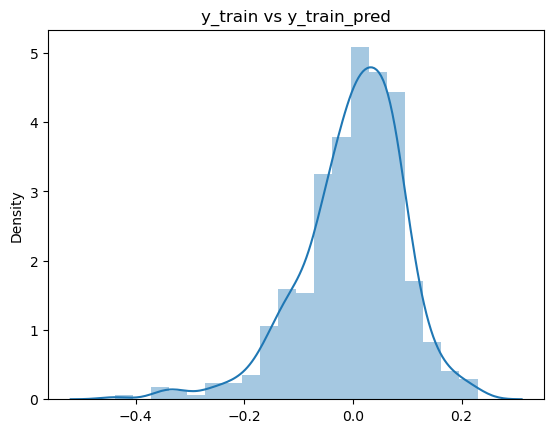

In [58]:
# Visualizing residual distribution
fig = plt.figure()
sns.distplot(residuals, bins=20)
plt.title("y_train vs y_train_pred")
plt.show()

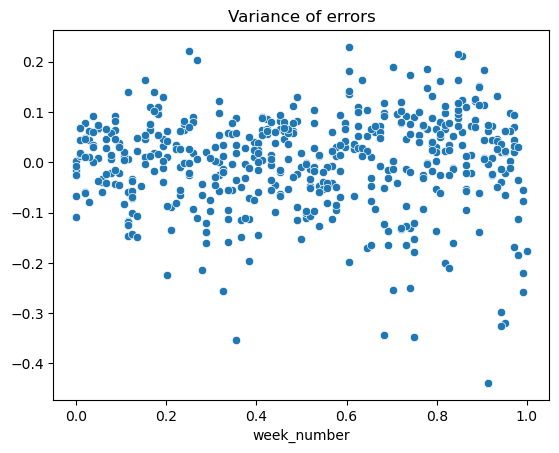

In [59]:
# Visualizing Homoscedasticity of errors
fig = plt.figure()
sns.scatterplot(X_train['week_number'], residuals)
plt.title("Variance of errors")
plt.show()

#### Observations on Residual Analysis
- Residual mean is zero and normally distributed.
- Variance of errors is constant.
- Hence all the assumptions of Linear regression are valid True.

### Making Prediction and Evaluation of the test set

In [60]:
# Applying scaling on test variables
test_data_new = test_data.copy()
test_data_new[num_vars] = scaler.transform(test_data_new[num_vars])

In [61]:
# Dividing test_data into X_test and y_test
y_test = test_data_new.pop('cnt')
X_test = test_data_new

In [62]:
# Now use the modell to make predictions

#Creating X_test_new dataframe with X_train columns
X_test_new = test_data_new[vars_model]

# adding constant to X_test
X_test_new = sm.add_constant(X_test_new)

X_test_new.head()

,const,yr,holiday,temp,hum,windspeed,rainy,summer,winter,aug,sep,oct
241,1.0,0,0,0.722754,0.378510,0.218022,0,0,0,1,0,0
493,1.0,1,0,0.642799,0.665446,0.458978,0,1,0,0,0,0
590,1.0,1,0,0.831783,0.581197,0.334409,0,0,0,1,0,0
488,1.0,1,0,0.708216,0.652626,0.318012,0,1,0,0,0,0
151,1.0,0,0,0.878510,0.567155,0.434409,0,1,0,0,0,0


In [63]:
X_test_new.shape

(218, 12)

In [64]:
# Making prediction
y_pred = lr_model.predict(X_test_new)

In [65]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.009431428072394388
r_square_value : 0.810573925521239


In [66]:
test_data_val = test_data_new
test_data_val = pd.concat([test_data_val,y_pred], axis=1).rename(columns = {0:'y_pred'})
test_data_val

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,week_number,misty,rainy,tue,wed,thur,fri,sat,sun,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,y_pred
241,2018-08-30,0,0,1,0.722754,0.689995,0.378510,0.218022,0.326923,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.512101
493,2019-05-09,1,0,1,0.642799,0.634223,0.665446,0.458978,0.673077,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.651120
590,2019-08-14,1,0,1,0.831783,0.799824,0.581197,0.334409,0.807692,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.745890
488,2019-05-04,1,0,1,0.708216,0.684928,0.652626,0.318012,0.663462,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.715385
151,2018-06-01,0,0,1,0.878510,0.858954,0.567155,0.434409,0.201923,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.592302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2018-05-10,0,0,1,0.589842,0.593671,0.291820,0.193408,0.173077,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.515938
340,2018-12-07,0,0,1,0.437201,0.429782,0.996948,0.590162,0.461538,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.122854
74,2018-03-16,0,0,1,0.381399,0.385200,0.712853,0.423930,0.096154,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.144321
476,2019-04-22,1,0,0,0.420587,0.415407,0.799146,0.796762,0.653846,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.325278


In [67]:
test_data_val = pd.concat([test_data_val,y_test], axis=1)

In [68]:
test_data_val

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,week_number,misty,rainy,tue,wed,thur,fri,sat,sun,summer,fall,winter,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,y_pred,cnt
241,2018-08-30,0,0,1,0.722754,0.689995,0.378510,0.218022,0.326923,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.512101,0.576240
493,2019-05-09,1,0,1,0.642799,0.634223,0.665446,0.458978,0.673077,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.651120,0.517445
590,2019-08-14,1,0,1,0.831783,0.799824,0.581197,0.334409,0.807692,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.745890,0.766993
488,2019-05-04,1,0,1,0.708216,0.684928,0.652626,0.318012,0.663462,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.715385,0.708077
151,2018-06-01,0,0,1,0.878510,0.858954,0.567155,0.434409,0.201923,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.592302,0.427744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2018-05-10,0,0,1,0.589842,0.593671,0.291820,0.193408,0.173077,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.515938,0.527828
340,2018-12-07,0,0,1,0.437201,0.429782,0.996948,0.590162,0.461538,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.122854,0.033080
74,2018-03-16,0,0,1,0.381399,0.385200,0.712853,0.423930,0.096154,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.144321,0.212604
476,2019-04-22,1,0,0,0.420587,0.415407,0.799146,0.796762,0.653846,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.325278,0.071955


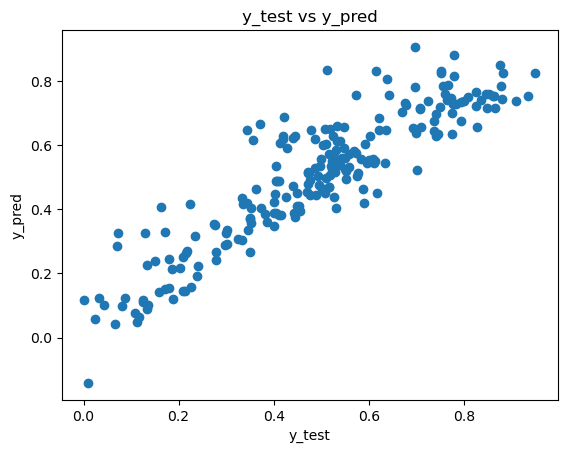

In [69]:
# Model Evaluation
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title("y_test vs y_pred")
plt.show()

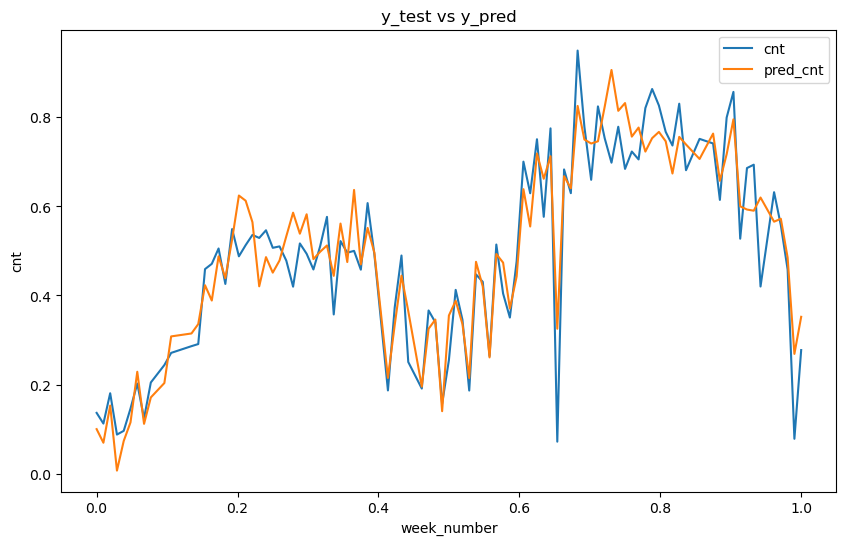

In [70]:
# Visualizing week vs cnt
plt.figure(figsize = (10,6))
sns.lineplot(data= test_data_val, x='week_number', y='cnt', ci=None)
sns.lineplot(data= test_data_val, x='week_number', y='y_pred', ci=None)
plt.legend(labels=["cnt","pred_cnt"])
plt.title("y_test vs y_pred")
plt.xlabel('week_number')
plt.ylabel('cnt')
plt.show()

In [71]:
residuals_test_data = y_test - y_pred

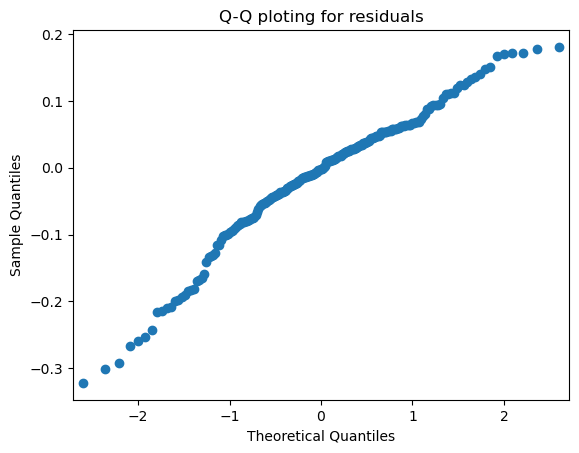

In [72]:
sm.qqplot(residuals_test_data)
plt.title('Q-Q ploting for residuals')
plt.show()